In [10]:
import matplotlib.pyplot as plt
import json

In [11]:
with open("benchmarking/timing_forward.json", "r") as f:
    forward = json.loads(f.read())
with open("benchmarking/timing_backward.json", "r") as f:
    backward = json.loads(f.read())

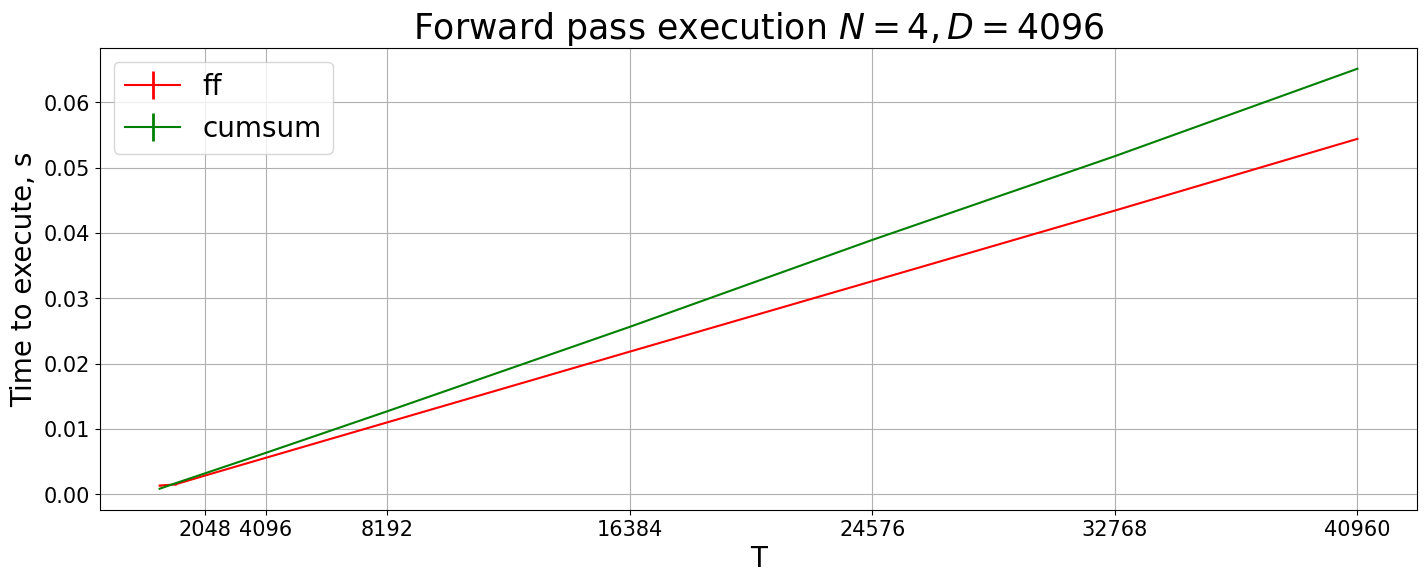

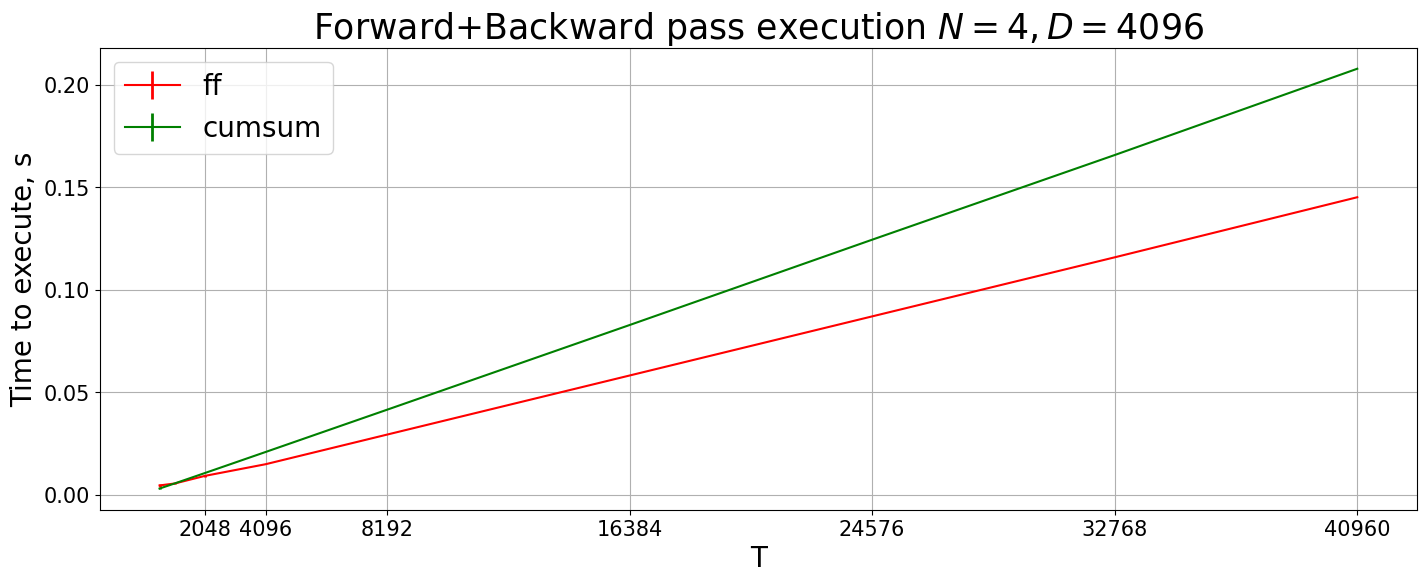

In [20]:
import statistics
from collections import defaultdict

approach2color = {
    'naive': 'blue',
    'ff': 'red',
    'cumsum': 'green',
    'fft_simple': 'purple',
    'fft_efficient': 'orange',
}

def plot(data, title, filename):
    Ts = []
    approach2mean = defaultdict(list)
    approach2std = defaultdict(list)
    for approach, T2time in data.items():
        for T, timing in T2time.items():
            if timing is not None:
                mean, std = statistics.mean(timing), statistics.stdev(timing)
                approach2mean[approach].append(mean)
                approach2std[approach].append(std)
        Ts = [int(t) for t in T2time.keys()]

    plt.figure(figsize=(17, 6))
    for approach in data:
        if approach in ["fft_simple", "naive"]:
            continue
        try:
            plt.errorbar(
                x=Ts, 
                y=approach2mean[approach], 
                yerr=approach2std[approach], 
                label=approach,
                elinewidth=2,
                color=approach2color[approach],
                ecolor=approach2color[approach]
            )
        except:
            pass

    plt.legend(prop={'size': 20})
    plt.xlabel("T", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel("Time to execute, s", fontsize=20)
    plt.xticks(ticks=Ts[:-2], labels=Ts[:-2], fontsize=15)
    plt.title(title, fontsize=25)
    plt.grid()
    plt.savefig(filename)

plot(forward, title="Forward pass execution $N = 4, D = 4096$", filename="f.png")
plot(backward, title="Forward+Backward pass execution $N = 4, D = 4096$", filename="fb.png")